# Minimum filter on 3-neighbourhood with 24 threads per core

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from utils import load_dataset, aggregate, plot_quantiles, plot_surface, plot_common
import matplotlib.pyplot as plt
from IPython.display import Markdown

algorithm = 'minfilter3d'
legend = "2048x2048x{n}"
method = 'mpi'
pd.set_option('display.max_rows', 10000)
data = load_dataset('csv', r'minfilter_test_2048x2048x[0-9]+_')
data = data[data['size'].isin([1, 2, 4, 6, 8]) & data['image_size'].isin([10, 50, 100, 500, 1000])]

In [2]:
aggregate(data, method=method, stat='total_op', aggfunc='median', print=True)

## All measured data

size                           1         2         4         6         8
image_size round rank                                                   
10.0       0     0        9719.0    5620.0    3396.0    2687.0    2324.0
                 1           NaN    5579.0    3433.0    2711.0    2229.0
                 2           NaN       NaN    3421.0    2755.0    2253.0
                 3           NaN       NaN    3402.0    2698.0    2247.0
                 4           NaN       NaN       NaN    2648.0    2186.0
                 5           NaN       NaN       NaN    2738.0    2287.0
                 6           NaN       NaN       NaN       NaN    2268.0
                 7           NaN       NaN       NaN       NaN    2319.0
           1     0       10595.0    5767.0    3270.0    2581.0    2637.0
                 1           NaN    5752.0    3298.0    2562.0    2611.0
                 2           NaN       NaN    3314.0    2511.0    2653.0
                 3           NaN       NaN    3283.0    2604.0    2654.0
                 4           NaN       NaN       NaN    2547.0    2579.0
                 5           NaN       NaN       NaN    2557.0    2596.0
                 6           NaN       NaN       NaN       NaN    2678.0
                 7           NaN       NaN       NaN       NaN    2589.0
           2     0       10649.0    5790.0    3205.0    2593.0    2284.0
                 1           NaN    5834.0    3248.0    2624.0    2200.0
                 2           NaN       NaN    3276.0    2671.0    2272.0
                 3           NaN       NaN    3231.0    2660.0    2243.0
                 4           NaN       NaN       NaN    2617.0    2199.0
                 5           NaN       NaN       NaN    2678.0    2215.0
                 6           NaN       NaN       NaN       NaN    2257.0
                 7           NaN       NaN       NaN       NaN    2297.0
           3     0        9661.0    5597.0    3230.0    2652.0    2350.0
                 1           NaN    5641.0    3217.0    2620.0    2243.0
                 2           NaN       NaN    3202.0    2599.0    2235.0
                 3           NaN       NaN    3243.0    2661.0    2294.0
                 4           NaN       NaN       NaN    2559.0    2169.0
                 5           NaN       NaN       NaN    2611.0    2257.0
                 6           NaN       NaN       NaN       NaN    2330.0
                 7           NaN       NaN       NaN       NaN    2309.0
           4     0       10552.0    5708.0    3402.0    2694.0    2611.0
                 1           NaN    5695.0    3423.0    2646.0    2624.0
                 2           NaN       NaN    3414.0    2664.0    2637.0
                 3           NaN       NaN    3382.0    2700.0    2677.0
                 4           NaN       NaN       NaN    2637.0    2707.0
                 5           NaN       NaN       NaN    2673.0    2664.0
                 6           NaN       NaN       NaN       NaN    2651.0
                 7           NaN       NaN       NaN       NaN    2691.0
           5     0        9577.0    5676.0    3310.0    2617.0    2349.0
                 1           NaN    5692.0    3283.0    2566.0    2255.0
                 2           NaN       NaN    3282.0    2502.0    2179.0
                 3           NaN       NaN    3310.0    2593.0    2300.0
                 4           NaN       NaN       NaN    2542.0    2323.0
                 5           NaN       NaN       NaN    2551.0    2270.0
                 6           NaN       NaN       NaN       NaN    2251.0
                 7           NaN       NaN       NaN       NaN    2327.0
           6     0       10715.0    5714.0    3234.0    2682.0    2295.0
                 1           NaN    5701.0    3265.0    2675.0    2211.0
                 2           NaN       NaN    3278.0    2632.0    2253.0
                 3           NaN       NaN    3250.0    2700.0    2225.0
                 4           NaN       NaN       NaN    26

## Max node time for each run/round

size                    1       2       4       6       8
image_size round                                         
10.0       0         9719    5620    3433    2755    2324
           1        10595    5767    3314    2604    2678
           2        10649    5834    3276    2678    2297
           3         9661    5641    3243    2661    2350
           4        10552    5708    3423    2700    2707
           5         9577    5692    3310    2617    2349
           6        10715    5714    3278    2700    2308
           7        10651    5749    3340    2606    2427
           8         9912    5761    3274    2730    2643
           9         9665    5646    3349    2662    2724
50.0       0        47079   25830   13568    9385    7779
           1        51745   26334   13675    9604    7573
           2        48523   23668   13421    9671    7585
           3        47453   26093   13956    9788    7800
           4        51564   26057   13899    9815    7668
           5        46495   26141   13572    9519    7665
           6        51921   26344   13866    9685    7494
           7        51955   25866   13826    9679    7666
           8        51872   25912   13395    9713    7453
           9        51489   26143   13504    9933    7732
100.0      0       101971   47351   27003   18866   14577
           1       102038   52301   26543   19360   14183
           2        94801   51899   27154   19218   14567
           3       101904   52538   26699   19116   14358
           4       104992   48384   26705   18357   14464
           5       100911   51857   26727   18842   14251
           6       102146   51749   26955   19089   14539
           7       102934   50998   26457   18622   14342
           8        92268   52379   26729   18915   14138
           9       103062   51217   26665   18667   14063
500.0      0       461652  310004  127286   89730   67132
           1       463032  258613  131007   89891   66840
           2       448886  257734  131860   87209   67161
           3       459969  255882  132894   90656   68377
           4       461548  232239  129218   91561   67951
           5       516958  257620  130718   92721   66866
           6       463683  256312  130981   91160   67975
           7       509340  257832  130130   90111   67983
           8       514841  262690  129769   89078   67609
           9       509883  258132  133494   89333   68287
1000.0     0      1072006  534321  268506  183243  139501
           1      1010625  528270  265247  187416  140064
           2       923958  531583  271932  186781  142321
           3      1036282  518612  270248  188286  138416
           4      1039620  527279  268806  185565  138538
           5       951801  518289  271200  176219  142383
           6      1074680  510479  265876  185594  138677
           7       933091  516429  276065  194313  135488
           8      1076255  529820  272402  174406  141537
           9       945363  546456  270228  180096  139691

size,1,2,4,6,8
image_size,,,,,
10.0,10,10,10,10,10
50.0,10,10,10,10,10
100.0,10,10,10,10,10
500.0,10,10,10,10,10
1000.0,10,10,10,10,10


size,1,2,4,6,8
image_size,,,,,
10.0,10232.0,5711.0,3312.0,2670.0,2388.5
50.0,51526.5,26075.0,13623.5,9682.0,7665.5
100.0,102004.5,51803.0,26716.0,18890.5,14350.0
500.0,463357.5,257783.0,130849.5,90001.0,67780.0
1000.0,1023453.5,527774.5,270238.0,185579.5,139596.0


## Speedup

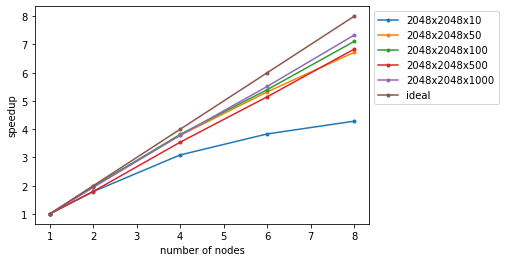

## Total time with 0.2quantile, 0.8quantile

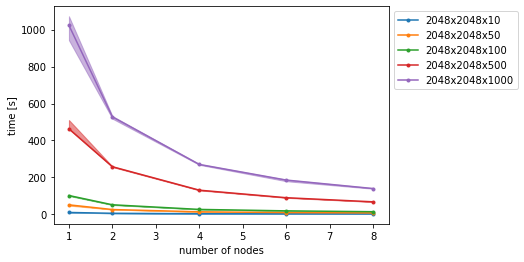

## Time as a function of image size and number of nodes

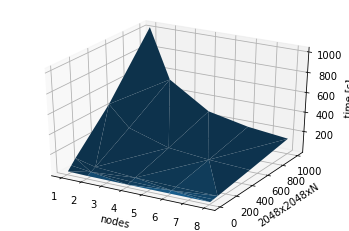

## MPI Gahering time

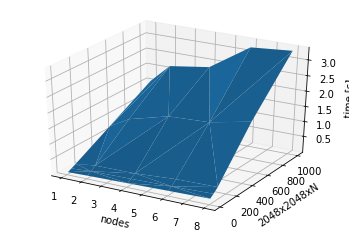

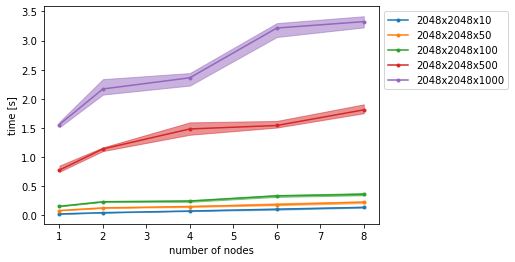

## barrier - waiting for all nodes before result transfer

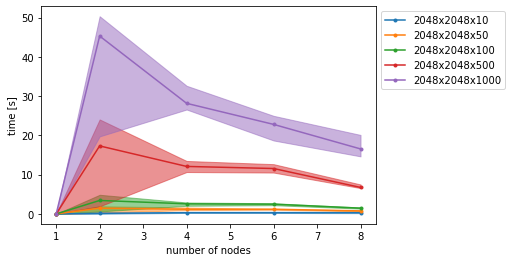

## Dataset read time

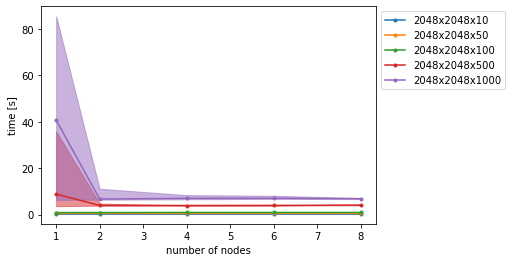

## Dataset write time

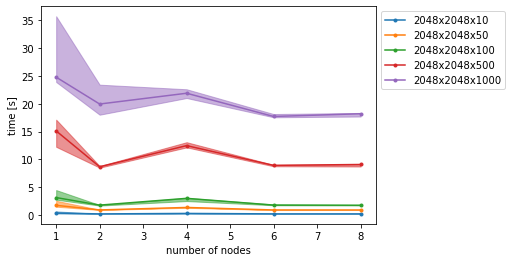

In [3]:
plot_common(data, algorithm=algorithm, method=method, legend=legend)